In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
from tueplots import bundles
import requests
plt.rcParams.update(bundles.icml2022())

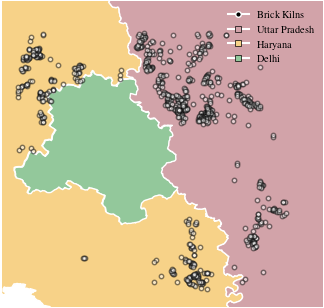

In [6]:

# Loading the Delhi NCR state files
geojson_path = 'DELHI_DISTRICTS.geojson'
gdf_dli = gpd.read_file(geojson_path)
polygon = gdf_dli.geometry.unary_union
gdf_dli = gpd.GeoDataFrame(geometry=[polygon], crs=gdf_dli.crs)

geojson_path = 'HARYANA_DISTRICTS.geojson'
gdf_har = gpd.read_file(geojson_path)
polygon = gdf_har.geometry.unary_union
gdf_har = gpd.GeoDataFrame(geometry=[polygon], crs=gdf_har.crs)


geojson_path = 'UTTAR PRADESH_DISTRICTS.geojson'
gdf_up = gpd.read_file(geojson_path)
polygon = gdf_up.geometry.unary_union
gdf_up = gpd.GeoDataFrame(geometry=[polygon], crs=gdf_up.crs)


fig, ax = plt.subplots(figsize=(3.3, 3.3))


data = pd.read_csv('brick_kilns_industry.csv')

# Convert latitude and longitude to Point geometries
geometry = [Point(lon, lat) for lat, lon in zip(data['latitude'], data['longitude'])]

# Create a GeoDataFrame from the points
points_gdf = gpd.GeoDataFrame(data, geometry=geometry)

gdf_dli.plot(ax=ax,color=(147/255, 200/255, 155/255), edgecolor='white', label = 'Delhi')
gdf_har.plot(ax= ax,color=(247/255, 210/255, 136/255), edgecolor='white', label = 'Haryana')
gdf_up.plot(ax= ax,color='#D2A3A9', edgecolor='white', label = 'Uttar Pradesh')

points_gdf.plot(ax=ax, color='white', marker='o', markersize=10, label='Brick Kilns', edgecolor= 'black', alpha=0.5)



# Create dummy scatter plot points for the legend
dummy_legend = [
    plt.Line2D([0], [0], marker='o', color='w', label='Brick Kilns', markerfacecolor='black', markersize=4, markeredgecolor='white'),
    plt.Line2D([0], [0], marker='s', color='w', label='Uttar Pradesh', markerfacecolor='#D2A3A9', markersize=4,markeredgecolor='black', markeredgewidth=0.5),
    plt.Line2D([0], [0], marker='s', color='w', label='Haryana', markerfacecolor=(247/255, 210/255, 136/255), markersize=4,markeredgecolor='black',markeredgewidth=0.5),
    plt.Line2D([0], [0], marker='s', color='w', label='Delhi', markerfacecolor=(147/255, 200/255, 155/255), markersize=4,markeredgecolor='black',markeredgewidth=0.5)
]

# Add the legend
ax.legend(handles=dummy_legend, loc='upper right', frameon=False, fontsize=7.5)

# Set the desired range of longitude values for x-axis display
desired_y_ticks = [28.15,28.2,28.3,28.4,28.5,28.6,28.7,28.8,28.9,29.0,29.1]
ax.set_ylim(min(desired_y_ticks), max(desired_y_ticks))

desired_x_ticks = [ 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7,77.8]
ax.set_xlim(min(desired_x_ticks), max(desired_x_ticks))

# Set x-axis ticks to only show the desired values
ax.set_xticks(desired_x_ticks)
ax.set_yticks(desired_y_ticks)


ax.axis('off')


sns.despine()
# Save the plot as a PDF file
plt.savefig("figure2.pdf", format="pdf")


# Show the plot
plt.show()

